In [23]:
# Hello World

# Hvilke plots?
# 1. Interactive line plot for hvert land over tid (line plot)
# 2. Chropleth world map af average temperature over tid (animation) - done!


# Jeg er gået over til at behandle lande i stedet for cities.

In [24]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pycountry
sns.set_theme()

In [155]:
# Load data
df = pd.read_csv('../data/GlobalLandTemperaturesByCity.csv')
df['dt'] = pd.DatetimeIndex(df['dt'])
df['Year'] = pd.DatetimeIndex(df['dt']).year
print(df.dtypes)
df

# Load by country
D = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')
D['dt'] = pd.DatetimeIndex(D['dt'])
D['Year'] = pd.DatetimeIndex(D['dt']).year
print(D.dtypes)



dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
Year                                      int64
dtype: object
dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
Year                                      int64
dtype: object


Text(0, 0.5, 'Count')

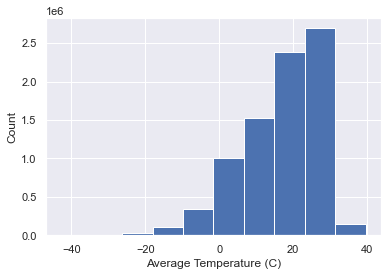

In [ ]:
plt.hist(df['AverageTemperature'])
plt.xlabel('Average Temperature (C)')
plt.ylabel('Count')

In [145]:
# For each country average all AverageTemperature values and add iso_alpha to countries
df_avg = pd.DataFrame({'AverageTemperature': df.groupby('Country')['AverageTemperature'].mean(), 'Country': df.groupby('Country')['Country'].first()})
df_avg = df_avg.reset_index(drop=True)
print('Average country temperature df: ', df_avg)

df_avg_city = pd.DataFrame({'AverageTemperature': df.groupby('City')['AverageTemperature'].mean(), 'City': df.groupby('City')['City'].first()})
df_avg_city = df_avg_city.reset_index(drop=True)
print('\n \n Average city temperature df: ', df_avg_city)

Average country temperature df:       AverageTemperature      Country
0             13.816497  Afghanistan
1             15.525828      Albania
2             17.763206      Algeria
3             21.759716       Angola
4             16.999216    Argentina
..                  ...          ...
154           25.482422    Venezuela
155           24.846825      Vietnam
156           25.768408        Yemen
157           20.937623       Zambia
158           19.822971     Zimbabwe

[159 rows x 2 columns]

 
 Average city temperature df:        AverageTemperature      City
0              13.147277  A Coruña
1               8.825173    Aachen
2               7.695135   Aalborg
3              26.612824       Aba
4              25.034749    Abadan
...                  ...       ...
3443            7.695135     Århus
3444           13.319012     Çorlu
3445            9.957553     Çorum
3446            1.308672   Öskemen
3447            5.930795    Ürümqi

[3448 rows x 2 columns]


In [146]:
import plotly.express as px
fig = px.choropleth(df_avg, locationmode="country names", locations="Country", color="AverageTemperature",
                     hover_name="Country", # column added to hover information
                     projection="natural earth")
fig.show()

In [159]:
D

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
1,1743-12-01,NaN,NaN,Åland,1743
2,1744-01-01,NaN,NaN,Åland,1744
3,1744-02-01,NaN,NaN,Åland,1744
4,1744-03-01,NaN,NaN,Åland,1744
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013
577458,2013-06-01,17.613,0.473,Zimbabwe,2013
577459,2013-07-01,17.000,0.453,Zimbabwe,2013
577460,2013-08-01,19.759,0.717,Zimbabwe,2013


In [164]:
import plotly.io as pio
pio.renderers.default = 'browser'
fig = px.choropleth(D, locationmode="country names", locations="Country", color="AverageTemperature", animation_frame='Year',
                     hover_name="Country",
                     projection="natural earth")
fig.show()
pio.renderers.default = 'notebook'
### Kritik punkter: DK, grøndlands, rusland: Kan det virkelig passe? + speedup + skulle man måske køre fra et lands eget index=mean

In [17]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

global_temp_country = pd.read_csv('../data/GlobalLandTemperaturesByCity.csv')

The following plot is strongly inspired by https://www.kaggle.com/code/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming#4)-Dynamic-map

In [21]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')